1. Import Necessary Libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
plt.style.use('ggplot')
from nltk.tokenize import word_tokenize
import gensim
import string
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm


In [3]:
df = pd.read_csv("/content/drive/MyDrive/amazon_reviews.csv.zip")

In [4]:
df.head(3)

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0


In [5]:
df.columns


Index(['Unnamed: 0', 'reviewerName', 'overall', 'reviewText', 'reviewTime',
       'day_diff', 'helpful_yes', 'helpful_no', 'total_vote',
       'score_pos_neg_diff', 'score_average_rating', 'wilson_lower_bound'],
      dtype='object')

In [6]:
df.shape

(4915, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4915 non-null   int64  
 1   reviewerName          4914 non-null   object 
 2   overall               4915 non-null   float64
 3   reviewText            4914 non-null   object 
 4   reviewTime            4915 non-null   object 
 5   day_diff              4915 non-null   int64  
 6   helpful_yes           4915 non-null   int64  
 7   helpful_no            4915 non-null   int64  
 8   total_vote            4915 non-null   int64  
 9   score_pos_neg_diff    4915 non-null   int64  
 10  score_average_rating  4915 non-null   float64
 11  wilson_lower_bound    4915 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 460.9+ KB


In [8]:
df.nunique(axis = 0)


Unnamed: 0              4915
reviewerName            4594
overall                    5
reviewText              4912
reviewTime               690
day_diff                 690
helpful_yes               23
helpful_no                17
total_vote                26
score_pos_neg_diff        27
score_average_rating      28
wilson_lower_bound        40
dtype: int64

In [9]:
df.isnull().sum()


Unnamed: 0              0
reviewerName            1
overall                 0
reviewText              1
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64

In [10]:
df = df[df['reviewerName'].notnull()]
df = df[df['reviewText'].notnull()]

In [11]:
df.isnull().sum()

Unnamed: 0              0
reviewerName            0
overall                 0
reviewText              0
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64

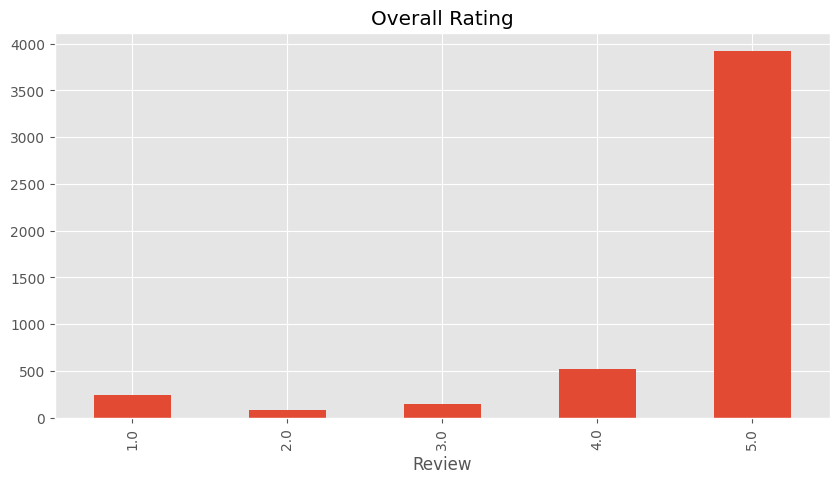

In [12]:
ad = df['overall'].value_counts().sort_index().plot(kind = 'bar', title = "Overall Rating", figsize = (10,5))
ad.set_xlabel("Review")
plt.show()

<Axes: title={'center': 'Avg. Rating'}>

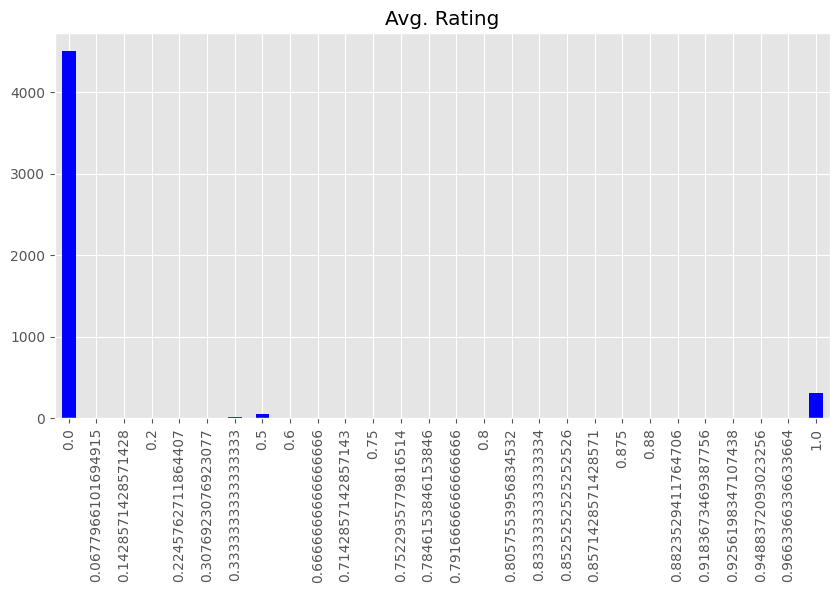

In [13]:
df['score_average_rating'].value_counts().sort_index().plot(kind = 'bar', title = "Avg. Rating", figsize = (10,5), color = 'blue')

<Axes: title={'center': 'Number of votes given to the evaluation'}>

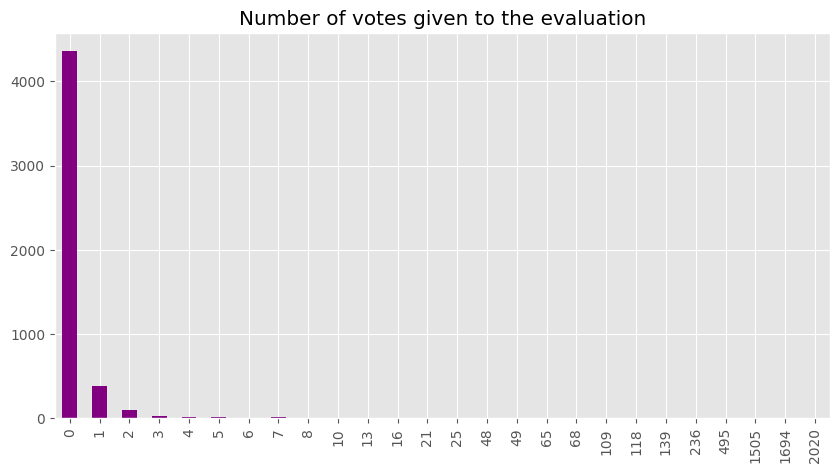

In [14]:
df['total_vote'].value_counts().sort_index().plot(kind = 'bar', title = 'Number of votes given to the evaluation', figsize = (10,5), color = 'purple')

In [15]:
for i in df:
    if i == 'reviewText':
        df[i] = df[i].str.lower()
        df[i] = df[i].str.replace('[^\w\s]', '')
        df[i] = df[i].str.replace('\d', '')

df

<ipython-input-15-b945f5654694>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df[i] = df[i].str.replace('[^\w\s]', '')
<ipython-input-15-b945f5654694>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df[i] = df[i].str.replace('\d', '')


,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
1,1,0mie,5.0,purchased this for my device it worked as adve...,2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected i should have sprung for ...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,this think has worked out greathad a diff bran...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,bought it with retail packaging arrived legit ...,2013-07-13,513,0,0,0,0,0.0,0.0
5,5,2Cents!,5.0,its mini storage it doesnt do anything else a...,2013-04-29,588,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1.0,i bought this sandisk gb class to use with my...,2013-07-23,503,0,0,0,0,0.0,0.0
4911,4911,Zo,5.0,used this for extending the capabilities of my...,2013-08-22,473,0,0,0,0,0.0,0.0
4912,4912,Z S Liske,5.0,great card that is very fast and reliable it c...,2014-03-31,252,0,0,0,0,0.0,0.0
4913,4913,Z Taylor,5.0,good amount of space for the stuff i want to d...,2013-09-16,448,0,0,0,0,0.0,0.0


In [16]:
old_name = 'Unnamed: 0'
new_name = 'ID'

df = df.rename(columns = {old_name:new_name})
df.head()

,ID,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
1,1,0mie,5.0,purchased this for my device it worked as adve...,2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected i should have sprung for ...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,this think has worked out greathad a diff bran...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,bought it with retail packaging arrived legit ...,2013-07-13,513,0,0,0,0,0.0,0.0
5,5,2Cents!,5.0,its mini storage it doesnt do anything else a...,2013-04-29,588,0,0,0,0,0.0,0.0


In [23]:
!pip install nltk
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [24]:
sia = SentimentIntensityAnalyzer()

In [25]:
df['reviewText'][10]

'i like this sd card because it can take music video downloads personal videos filesdocs and multimedia images with a fast transfer rate of class  speed it can take games with large files very easily and still have enough space for apps its great for video cameras and camcorders with the supplied adapter fits very easily into smartphones and tablets sd card slots i recommend this gb sd card to everyone'

In [26]:
sia.polarity_scores(df['reviewText'][10])

{'neg': 0.0, 'neu': 0.813, 'pos': 0.187, 'compound': 0.9258}

In [27]:
df.columns

Index(['ID', 'reviewerName', 'overall', 'reviewText', 'reviewTime', 'day_diff',
       'helpful_yes', 'helpful_no', 'total_vote', 'score_pos_neg_diff',
       'score_average_rating', 'wilson_lower_bound'],
      dtype='object')

In [28]:
res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    text = row['reviewText']
    myid = row['ID']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/4913 [00:00<?, ?it/s]

In [29]:
pd.DataFrame(res).T

,neg,neu,pos,compound
1,0.075,0.925,0.000,-0.2960
2,0.077,0.923,0.000,-0.3089
3,0.000,0.915,0.085,0.6486
4,0.040,0.828,0.132,0.7087
5,0.000,1.000,0.000,0.0000
...,...,...,...,...
4910,0.093,0.814,0.093,0.0018
4911,0.000,0.937,0.063,0.1761
4912,0.000,0.830,0.170,0.8481
4913,0.000,0.802,0.198,0.4939


In [30]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns = {'index':'ID'})
vaders = vaders.merge(df, how = 'left')

In [31]:
vaders

,ID,neg,neu,pos,compound,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,1,0.075,0.925,0.000,-0.2960,0mie,5.0,purchased this for my device it worked as adve...,2013-10-25,409,0,0,0,0,0.0,0.0
1,2,0.077,0.923,0.000,-0.3089,1K3,4.0,it works as expected i should have sprung for ...,2012-12-23,715,0,0,0,0,0.0,0.0
2,3,0.000,0.915,0.085,0.6486,1m2,5.0,this think has worked out greathad a diff bran...,2013-11-21,382,0,0,0,0,0.0,0.0
3,4,0.040,0.828,0.132,0.7087,2&amp;1/2Men,5.0,bought it with retail packaging arrived legit ...,2013-07-13,513,0,0,0,0,0.0,0.0
4,5,0.000,1.000,0.000,0.0000,2Cents!,5.0,its mini storage it doesnt do anything else a...,2013-04-29,588,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4908,4910,0.093,0.814,0.093,0.0018,"ZM ""J""",1.0,i bought this sandisk gb class to use with my...,2013-07-23,503,0,0,0,0,0.0,0.0
4909,4911,0.000,0.937,0.063,0.1761,Zo,5.0,used this for extending the capabilities of my...,2013-08-22,473,0,0,0,0,0.0,0.0
4910,4912,0.000,0.830,0.170,0.8481,Z S Liske,5.0,great card that is very fast and reliable it c...,2014-03-31,252,0,0,0,0,0.0,0.0
4911,4913,0.000,0.802,0.198,0.4939,Z Taylor,5.0,good amount of space for the stuff i want to d...,2013-09-16,448,0,0,0,0,0.0,0.0


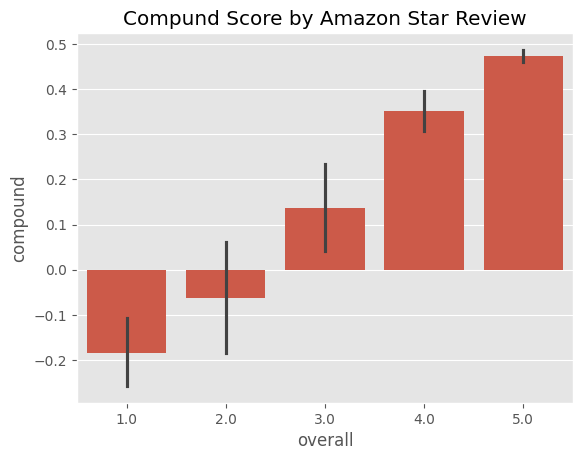

In [32]:
gph = sns.barplot(data = vaders, x = 'overall', y = 'compound')
gph.set_title('Compund Score by Amazon Star Review')
plt.show()

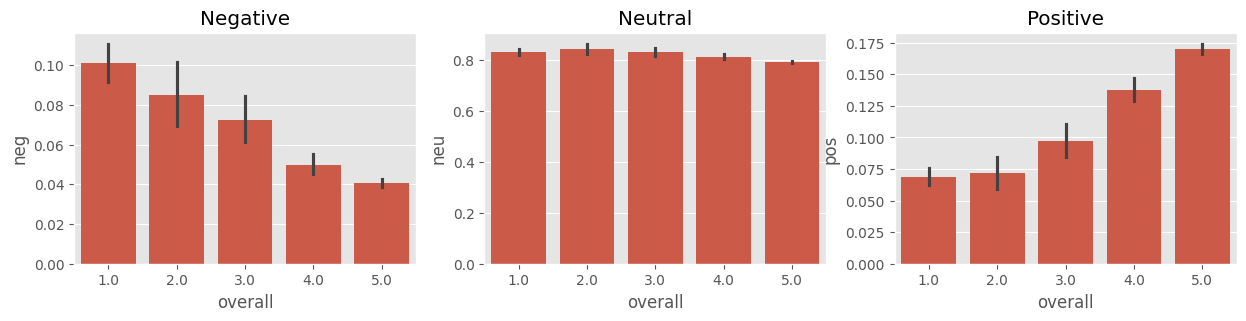

In [33]:
fig, ax = plt.subplots(1,3, figsize = (15,3))
sns.barplot(data = vaders, x = 'overall', y = 'neg', ax = ax[0])
sns.barplot(data = vaders, x = 'overall', y = 'neu', ax = ax[1])
sns.barplot(data = vaders, x = 'overall', y = 'pos', ax = ax[2])
ax[0].set_title('Negative')
ax[1].set_title('Neutral')
ax[2].set_title('Positive')
plt.show()

In [34]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [35]:
Model = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(Model)
model = AutoModelForSequenceClassification.from_pretrained(Model)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [36]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors = 'pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberat_pos' : scores[2]
    }
    return scores_dict
polarity_scores_roberta("This is too good")

{'roberta_neg': 0.0028646914,
 'roberta_neu': 0.010610025,
 'roberat_pos': 0.9865253}

In [37]:
res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    try:
        text = row['reviewText']
        myid = row['ID']
        vader_results = sia.polarity_scores(text)
        vader_results_rename = {}
        for key, value in vader_results.items():
            vader_results_rename[f"vader_{key}"] = value
        roberta_results = polarity_scores_roberta(text)
        combine = {**vader_results, **roberta_results}
        res[myid] = combine
    except Exception as e:
        print(f"Error processing ID {myid}: {e}")

  0%|          | 0/4913 [00:00<?, ?it/s]

Error processing ID 76: The expanded size of the tensor (838) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 838].  Tensor sizes: [1, 514]
Error processing ID 123: The expanded size of the tensor (869) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 869].  Tensor sizes: [1, 514]
Error processing ID 2031: The expanded size of the tensor (1212) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1212].  Tensor sizes: [1, 514]
Error processing ID 2799: The expanded size of the tensor (547) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 547].  Tensor sizes: [1, 514]
Error processing ID 2881: The expanded size of the tensor (520) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 520].  Tensor sizes: [1, 514]
Error processing ID 2934: The expanded size of the tensor (948) must match the existing size (514) at non-singl

In [38]:
results = pd.DataFrame(res).T
results = results.reset_index().rename(columns = {'index':'ID'})
results = results.merge(df, how = 'left')

In [39]:
results.head()

,ID,neg,neu,pos,compound,roberta_neg,roberta_neu,roberat_pos,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,1,0.075,0.925,0.000,-0.2960,0.005722,0.069603,0.924674,0mie,5.0,purchased this for my device it worked as adve...,2013-10-25,409,0,0,0,0,0.0,0.0
1,2,0.077,0.923,0.000,-0.3089,0.242629,0.511895,0.245475,1K3,4.0,it works as expected i should have sprung for ...,2012-12-23,715,0,0,0,0,0.0,0.0
2,3,0.000,0.915,0.085,0.6486,0.002545,0.026032,0.971423,1m2,5.0,this think has worked out greathad a diff bran...,2013-11-21,382,0,0,0,0,0.0,0.0
3,4,0.040,0.828,0.132,0.7087,0.003348,0.071685,0.924967,2&amp;1/2Men,5.0,bought it with retail packaging arrived legit ...,2013-07-13,513,0,0,0,0,0.0,0.0
4,5,0.000,1.000,0.000,0.0000,0.104282,0.551408,0.344311,2Cents!,5.0,its mini storage it doesnt do anything else a...,2013-04-29,588,0,0,0,0,0.0,0.0


Comparing the Models Vader & Roberta

In [40]:
results.columns

Index(['ID', 'neg', 'neu', 'pos', 'compound', 'roberta_neg', 'roberta_neu',
       'roberat_pos', 'reviewerName', 'overall', 'reviewText', 'reviewTime',
       'day_diff', 'helpful_yes', 'helpful_no', 'total_vote',
       'score_pos_neg_diff', 'score_average_rating', 'wilson_lower_bound'],
      dtype='object')

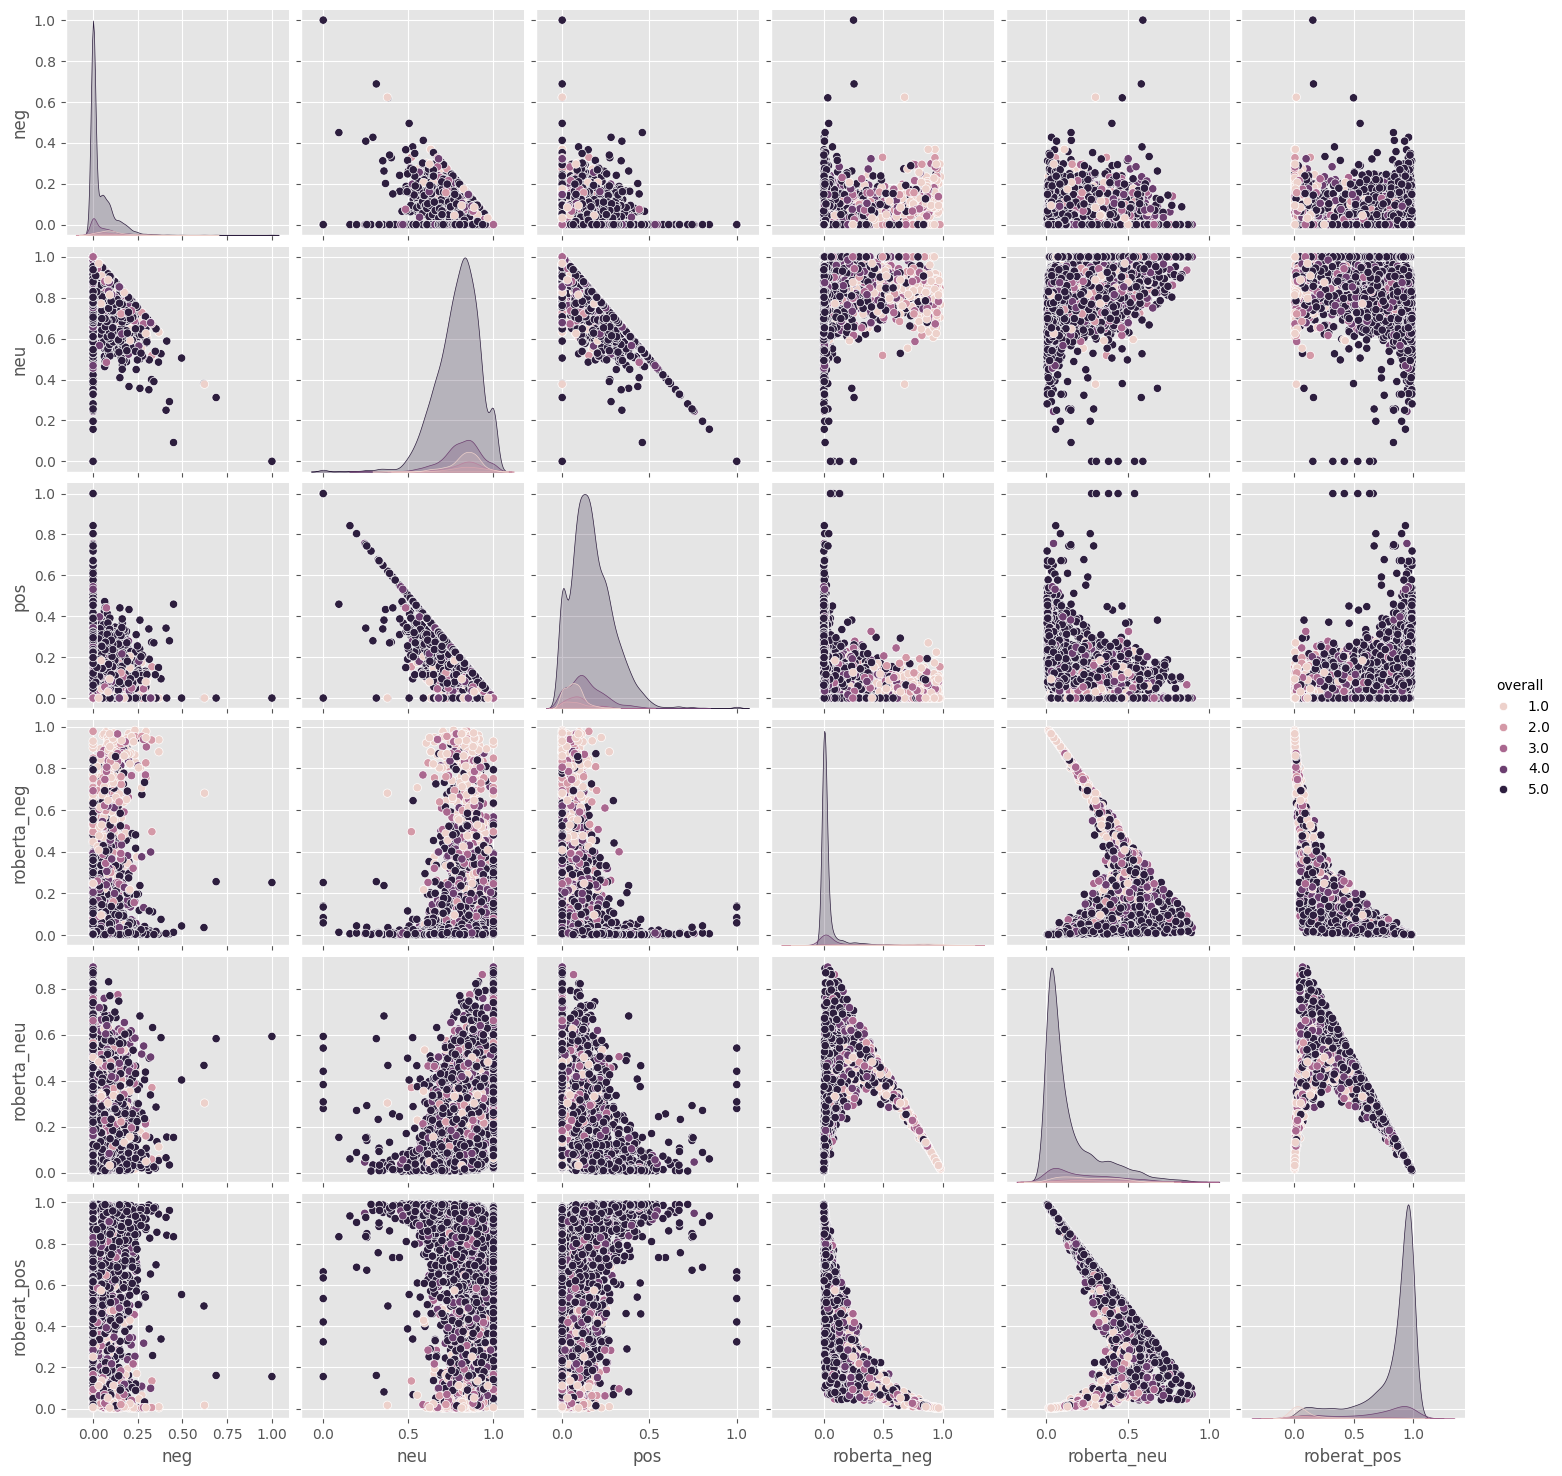

In [41]:
sns.pairplot(data = results, vars = ['neg', 'neu', 'pos', 'roberta_neg', 'roberta_neu', 'roberat_pos'], hue = 'overall')
plt.show()

In [42]:
results.query('overall == 1').sort_values('roberat_pos', ascending = False)

,ID,neg,neu,pos,compound,roberta_neg,roberta_neu,roberat_pos,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
4078,4091,0.000,0.816,0.184,0.6369,0.008571,0.080179,0.911250,Scott,1.0,i returned to order a laptop so i could have ...,2014-08-05,125,0,2,2,-2,0.0,0.000000
1886,1890,0.112,0.785,0.102,-0.1548,0.035522,0.182310,0.782168,gt,1.0,i have zero complaints this card does exactly ...,2012-04-11,971,0,0,0,0,0.0,0.000000
1787,1791,0.049,0.753,0.198,0.9199,0.054663,0.168719,0.776618,G. Evans,1.0,i didnt even have this card installed in my m...,2013-03-23,625,4,1,5,3,0.8,0.375535
349,353,0.000,0.932,0.068,0.4404,0.042377,0.201792,0.755831,Amazon Don,1.0,card is good i ordered one before and it perfo...,2013-09-12,452,0,0,0,0,0.0,0.000000
3148,3157,0.043,0.681,0.277,0.8750,0.069158,0.243777,0.687065,Michael,1.0,the card only read as gb not gb i have forma...,2014-07-07,154,0,1,1,-1,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,933,0.072,0.830,0.098,0.5200,0.974603,0.022934,0.002462,Chris Belardinelli,1.0,ive only had this memory card for weeks and i...,2013-05-02,585,1,1,2,0,0.5,0.094531
4363,4377,0.116,0.884,0.000,-0.7862,0.969159,0.028472,0.002369,Sujith Nair,1.0,first of all i am not sure if the product i re...,2013-07-27,499,0,0,0,0,0.0,0.000000
2676,2681,0.142,0.858,0.000,-0.7269,0.956094,0.041576,0.002330,"K. Gross ""S.F. Magician""",1.0,card has failed several times in the phone i i...,2013-05-20,567,0,0,0,0,0.0,0.000000
4268,4282,0.111,0.889,0.000,-0.4576,0.943657,0.054040,0.002303,SreWolfe,1.0,performance and capacity were not in line with...,2013-01-09,698,0,0,0,0,0.0,0.000000


In [43]:
results.query('overall == 1').sort_values('roberat_pos', ascending = False)['reviewText'].values[0]

'i returned to order a  laptop so i could have full operations than having a notebook i am sure this is good quality as i have purchased san disk numerous times'

In [44]:
results.query('overall == 5').sort_values('roberta_neg', ascending = False)['reviewText'].values[0]

'works and why should i write more damn it eleven more words finally am done with this crap three more words'

In [45]:
results.query('overall == 5').sort_values('pos', ascending = False)['reviewText'].values[0]

'perfect'

In [46]:
results.query('overall == 1').sort_values('neg', ascending = False)['reviewText'].values[0]

'failed after a year'